### Problem Statement:

The Goal of this Projet is to give people an estimate of how much they need based on their individual health stituation. After that, customers can work with any health insurance carrier and its plans and perks while keeping the projected cost from our study in mind. This can assist a person in concentrating on the health side of an insurance policy rather than ineffective part.

In [264]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)

%matplotlib inline
sns.set()

In [265]:
# importing dataset

data = pd.read_csv('insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [266]:
# checking the dimensions of the dataframe

data.shape

(1338, 7)

In [267]:
# Checking type and value count of each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [268]:
# Checking the statistical aspects of the dataframe

data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [269]:
# Checking missing value in dataset

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

### Data Visualization

- Univariate analysis

In [270]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [271]:
# Plotting numerical columns

num_cols = data.select_dtypes(exclude = 'object')
num_cols.columns

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

In [272]:
cat_cols = data.select_dtypes(include = 'object')
cat_cols.columns

Index(['sex', 'smoker', 'region'], dtype='object')

<Figure size 1080x432 with 0 Axes>

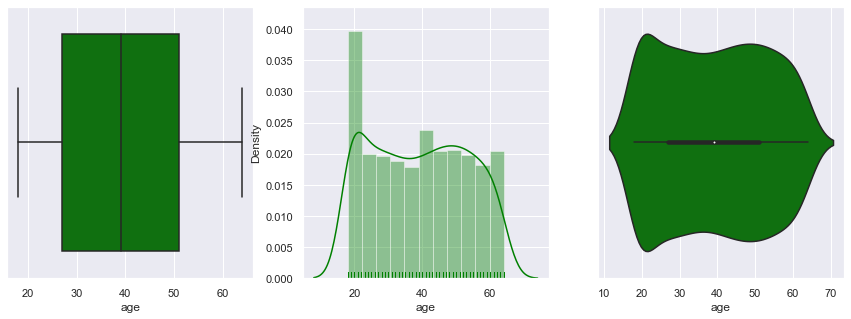

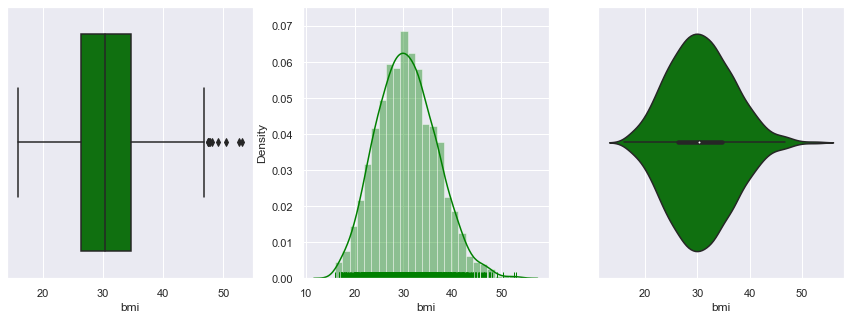

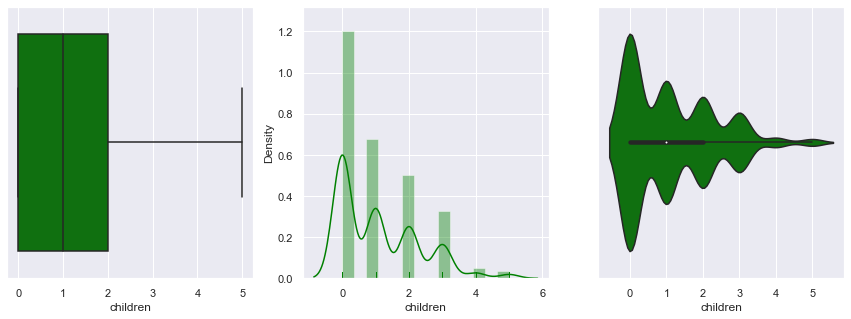

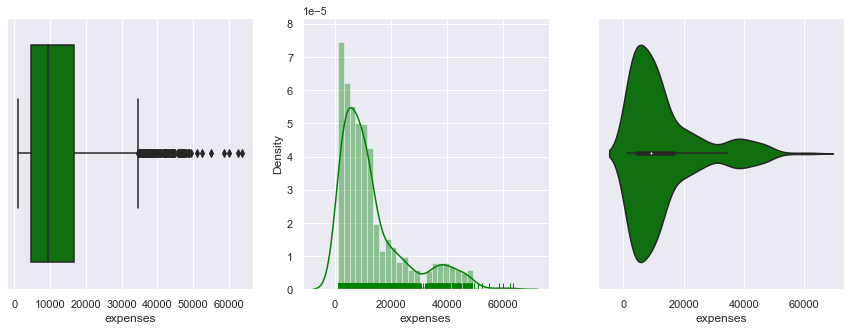

In [273]:
plt.figure(figsize = (15,6))
f_num = num_cols.columns[:]

for i in enumerate(f_num):
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(131)
    sns.boxplot(data[i[1]], color= 'Green')

    ax1 = f.add_subplot(132)
    sns.distplot(data[i[1]], rug = True,  color= 'Green')
    
    ax2 = f.add_subplot(133)
    sns.violinplot(data[i[1]], orient= 'vertical',  color= 'Green')
    
    plt.show()

### Inferences:

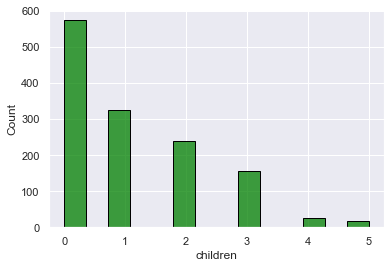

In [274]:
# Here we have childern column as categorical column

sns.histplot(data.children, color= 'Green',edgecolor='Black')
plt.show()

### Inferences:

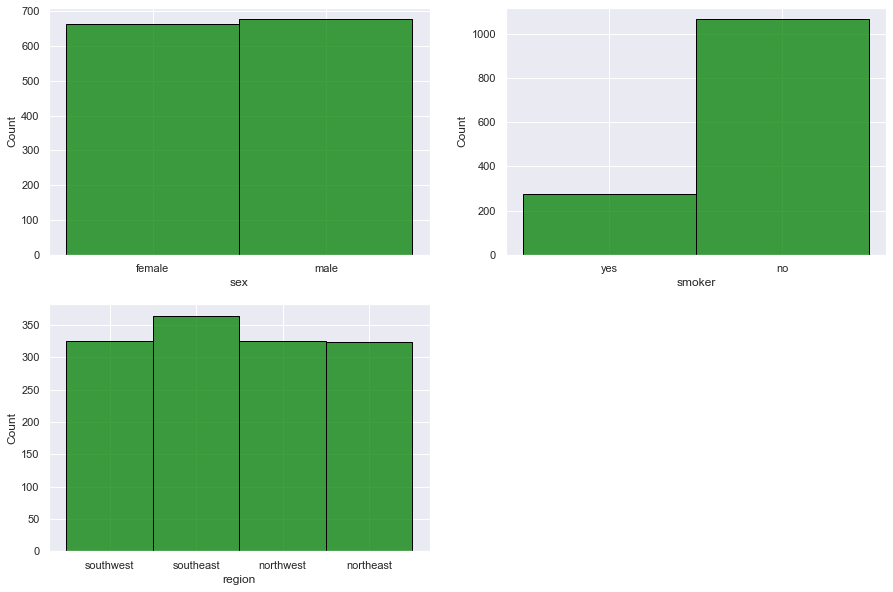

In [275]:
plt.figure(figsize = (15,10))

f_cat = cat_cols.columns[:]

for i in enumerate(f_cat):
    plt.subplot(2,2,i[0]+1)
    sns.histplot(cat_cols[i[1]], color= 'Green',edgecolor='Black')

### Inferences:

### Data Visualization
- Bivariate analysis w.r.t. expenses

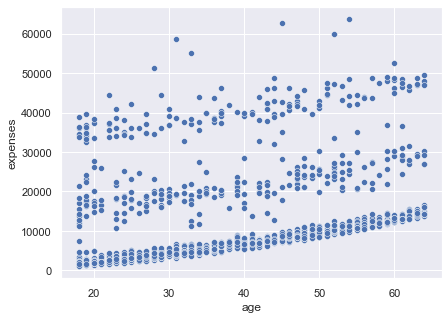

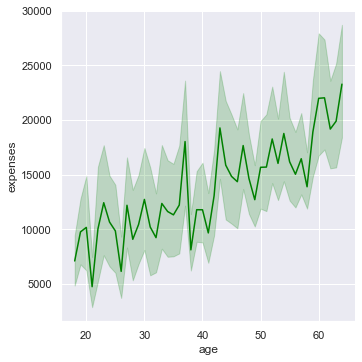

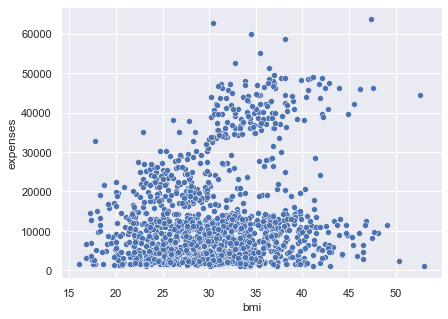

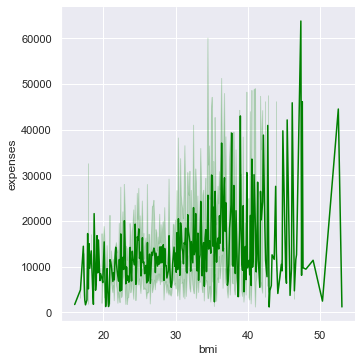

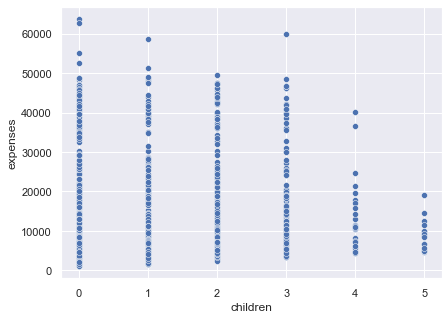

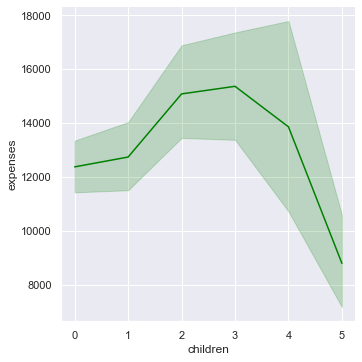

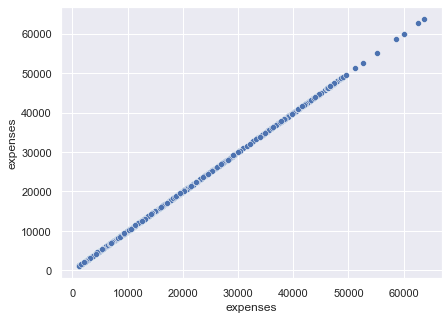

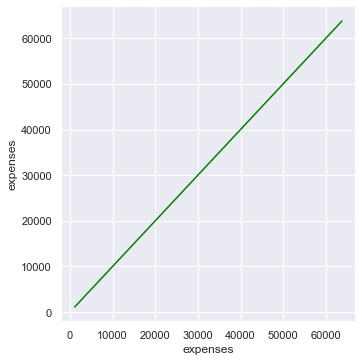

In [276]:
for i in enumerate(f_num):
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(121)
    sns.scatterplot(x = num_cols[i[1]], y= data.expenses)

    ax1 = f.add_subplot(121)
    sns.relplot(data[i[1]],y= data.expenses, color= 'Green',kind="line")
    plt.show()


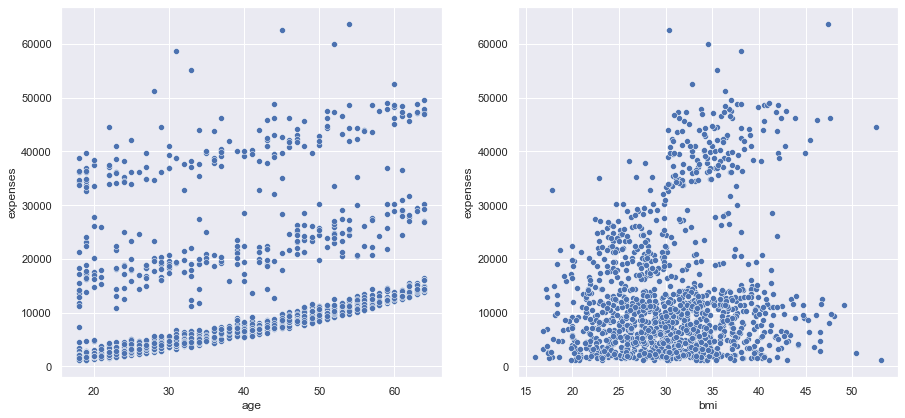

In [277]:
plt.figure(figsize = (15,15))
f_num = num_cols.columns[:-2]

for i in enumerate(f_num):
    plt.subplot(2,2,i[0]+1)
    sns.scatterplot(x = num_cols[i[1]], y= data.expenses)


### Inferences:

<Figure size 720x720 with 0 Axes>

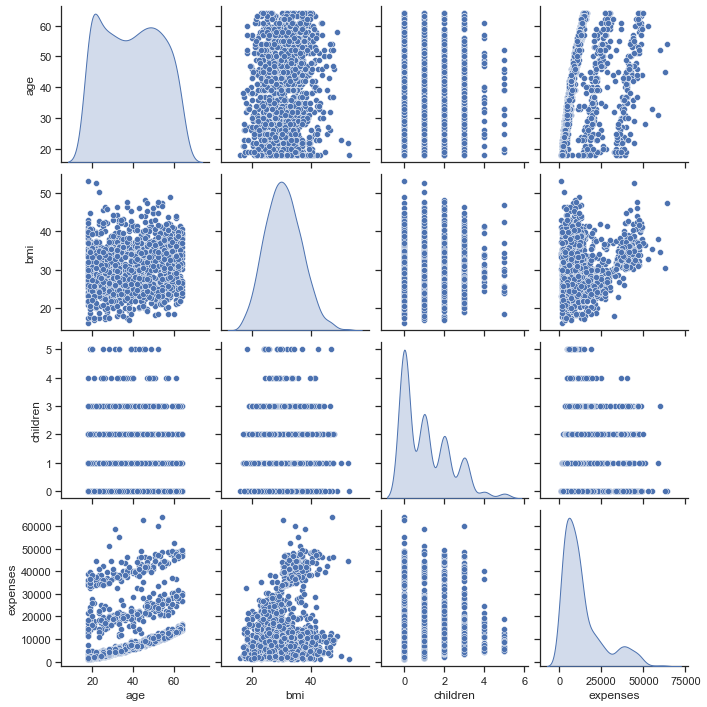

In [278]:
# Plotting pairplot for dataset
sns.set_theme(style="ticks")
plt.figure(figsize= (10,10))
sns.pairplot(data, diag_kind = 'kde')
plt.show()